In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

In [3]:
img1 = cv2.imread('images/minimal.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print('No. of channels of image 1: ' + str(img1.shape[2]))

img2 = cv2.imread('images/anime_sky.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print('No. of channels of image 2: ' + str(img2.shape[2]))

No. of channels of image 1: 3
No. of channels of image 2: 3


In [4]:
img1_channels = cv2.split(img1)
img2_channels = cv2.split(img2)

## Histogram matching

In [5]:
matched_channels = []

for i in range(img1.shape[2]):
    matched_channel = match_histograms(img1_channels[i], img2_channels[i])
    matched_channels.append(matched_channel)

matched = cv2.merge(matched_channels)

In [6]:
def show_img(ax, img, title=None):
    ax.imshow(img);
    ax.axis('off')
    ax.set_title(title);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


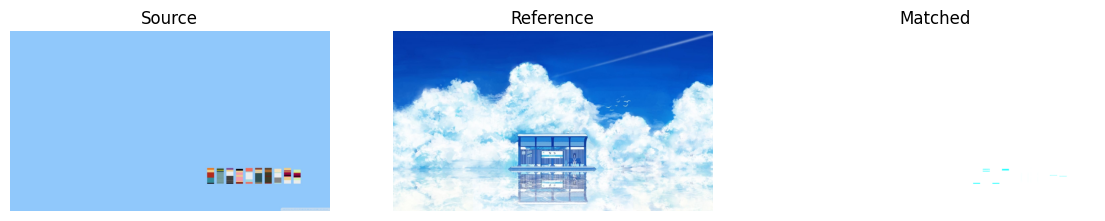

In [7]:
fig, axs = plt.subplots(1, 3, figsize = (14,7))
show_img(axs[0], img1, 'Source')
show_img(axs[1], img2, 'Reference')
show_img(axs[2], matched, 'Matched')

## Histogram Equalization

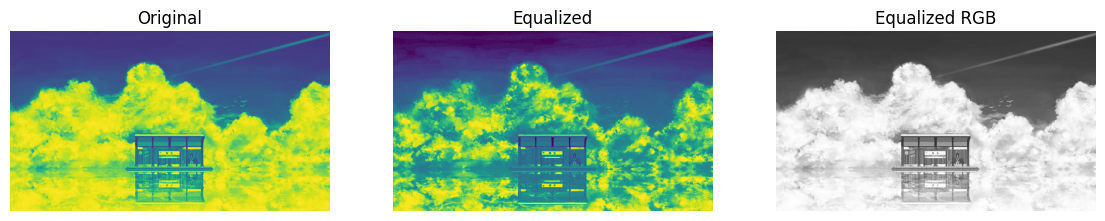

In [9]:
#img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

equ = cv2.equalizeHist(img2)
equ_rgb = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
fig, axs = plt.subplots(1, 3, figsize = (14,7))
show_img(axs[0], img2, 'Original')
show_img(axs[1], equ, 'Equalized')
show_img(axs[2], equ_rgb, 'Equalized RGB')